In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [475]:
file = "speed.csv"
data = pd.read_csv(file)
df = np.array(pd.DataFrame(data))
met = df[:, 0]
t = df[:, 1]
# um = np.mean(met)
# ut = np.mean(t)
# M = (met - um) / (np.max(met) - np.min(met))
# T = (t - ut) / (np.max(t) - np.min(t))
M = met / np.max(met)
T = t / np.max(t)

In [647]:
alfa = 0

def Mb(W, b):
    pars = 0
    for l in range(len(W)):
        if W[l] is not None:
            par = W[l] * (T ** (l + 1))
            pars += par
        else:
            pass
    return np.array(pars + b)

def J(W, b):
    j = (np.sum(Mb(W, b) - M))**2 / 2*len(T) + np.sum(W**2) * alfa / 2*len(T)
    return j

def jdWb(W, b):
    wbs = np.zeros(len(W)+1)
    for u in range(len(W)):
        if W[u] is not None:
            dw = float(np.sum((Mb(W, b) - M)*T**(u+1))/len(T) + W[u]*alfa/len(T))
            wbs[u] = dw
        else:
            pass
    wbs[-1] = float(np.sum(Mb(W, b) - M)/len(T))
    return np.array(wbs)

es = 1.2261
rp = 1000
wb = np.zeros(5)
jj = np.zeros(rp)
for i in range(rp):
    wb = wb - es * jdWb(wb[:-1], wb[-1])
    jj[i] = J(wb[:-1], wb[-1])

print(wb)
print(jj[-1])

[ 1.37242834 -0.18006248 -0.33541857 -0.08777322  0.2098316 ]
1.788358232749066e-11


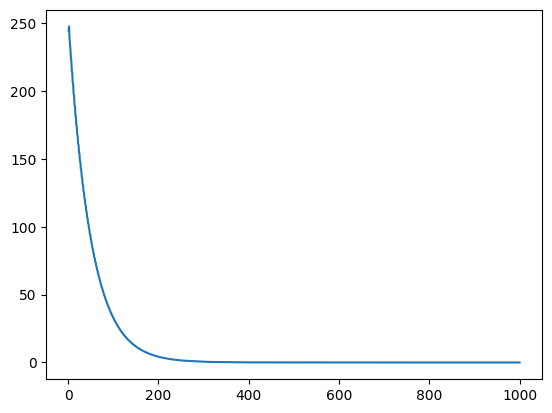

In [648]:
a = np.arange(1, rp+1)
plt.plot(a, jj)
plt.show()

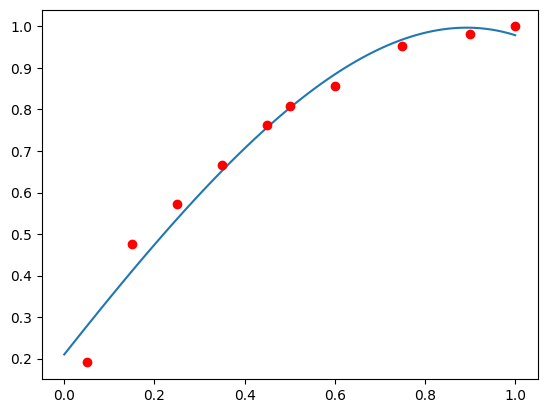

In [649]:
x = np.linspace(0, 1, 100)
y = wb[0]*x + wb[1]*x**2 + wb[2]*x**3 + wb[3]*x**4 + wb[4]
plt.plot(x, y)
plt.plot(T, M, 'ro')
plt.show()

In [181]:
import re
def dot(a):
    b = str(a)
    c = re.findall('[0-9]+', b)
    return f"{c[0]}"#.{c[1][0]}{c[1][1]}"

M_bar = wb[0]*T + wb[1]*T**2 + wb[2]*T**3 + wb[3]*T**4 + wb[4] 
print(met)
M = M_bar*np.max(met)
m = np.zeros(len(M))
for i in range(len(M)):
    n = dot(M[i])
    m[i] = n
print(m)

[ 20  50  60  70  80  85  90 100 103 105]
[ 29.  43.  56.  68.  79.  84.  92. 101. 104. 102.]
